# Imports

There is also a file named `requirements.txt`, which will install all dependencies required for training to work.

Note: Mask-RCNN does **NOT** work with Tensorflow 2. This notebook has been run with:

- Python 3.7
- Tensorflow 1.15.0 (or tensorflow-gpu)
- Keras 2.4.5

In [1]:
# Comment out to reload imported modules if they change
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf

# Comment out everything below if you are NOT using a GPU for training.
# Feel free to change the config.gpu_options.per_process_gpu_memory_fraction to an appropriate percentage
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# config.gpu_options.per_process_gpu_memory_fraction = 0.4
# tf.Session(config=config)

Note: The directory can also be concatenated using `os.path.join()` in the event you don't want to mess with the `\` convention for Windows and the universal `/` convention for every other OS. Also note that using `\` in syntax requires you to write it out as `\\` because this indicates the insert of a special character (i.e `\n` means new line).

If you're on Windows, and you're using `os.path.join`, it's a good idea to leave the directory with a `\\` so that all the occurrences of `os.path.join()` will know that a `\` convention is used.

In [3]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = 'C:\\Users\\iFai1\Documents\\GitHub\\Coregistration-Detection\\Detection\\Mask-RCNN\\'

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import samples.spine_segmented.spine_segmented as spine

%matplotlib inline 

# Directory to save logs and trained model
LOGS_DIR = os.path.join(ROOT_DIR, "logs")

Using TensorFlow backend.


# Training

There is another notebook that goes through training independent of inputting into the command line, such as the command below. That notebook in particular will give a better understanding of how training works.

For simplicity in this notebook, we simply call the command below to launch training.

## Reference of Commands
For reference, this is a copy and paste of of training commands from the Mask-RCNN README:

We're providing pre-trained weights for MS COCO to make it easier to start. You can
use those weights as a starting point to train your own variation on the network.
Training and evaluation code is in `samples/coco/coco.py`. You can import this
module in Jupyter notebook (see the provided notebooks for examples) or you
can run it directly from the command line as such:

```
# Train a new model starting from pre-trained COCO weights
python3 samples/coco/coco.py train --dataset=/path/to/coco/ --model=coco

# Train a new model starting from ImageNet weights
python3 samples/coco/coco.py train --dataset=/path/to/coco/ --model=imagenet

# Continue training a model that you had trained earlier
python3 samples/coco/coco.py train --dataset=/path/to/coco/ --model=/path/to/weights.h5

# Continue training the last model you trained. This will find
# the last trained weights in the model directory.
python3 samples/coco/coco.py train --dataset=/path/to/coco/ --model=last
```

You can also run the COCO evaluation code with:
```
# Run COCO evaluation on the last trained model
python3 samples/coco/coco.py evaluate --dataset=/path/to/coco/ --model=last
```

## Troubleshooting

Here are some common problems I have came across when trying to get this to run on my computer. Refer to these if you're stuck.

1. There's an error indicating directories weren't found, or some of the parameters (i.e --weights="coco") are not valid.
    - Check to make sure directory paths are valid. Also, Windows convention (not surprised) must use `"` instead of `'` when inputting strings/parameters. For example, saying `--weights='coco'` on Windows will import it as `'coco'`, and Mask-RCNN is just checking for `coco`.
    
    
2. `Resource exhausted: OOM when allocating tensor with shape[128,14,14,256] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc`
    - There's not enough VRAM on your GPU. This could be of two causes. Check to see if you have other datasets/Jupyter notebooks loaded and running on your card. Be sure to shut them off. If you are still experiencing this problem, your `config.gpu_options.per_process_gpu_memory_fraction` config in the beginning of the notebook (when importing Tensorflow) might be set too high.
    - Also, if you have ran this notebook multiple times, you should restart the kernel to clear any old datasets and imports that have been loaded onto the card. Then, run this again.

3. `ValueError: need at least one array to stack`
    - This is most likely caused by an image that doesn't have **at least** one mask for the image. Causing an error. Make sure to clean up your dataset if that is the case! There should be some scripts in `/data_utils` that I have created that will do this.
    - You also might not have matching masks in the `val`/validation folder as well. Double check! Also, you **MUST** have at least 1 image & mask pair in the val folder for the training to not error.

4. `Cannot find mrcnn`
    - There should be 3 locations where you define the root directory of MRCNN. The first 2 are in this notebook (the first time above and the directory of the .py file below. The third one is inside the actual .py file itself.

In [14]:
!python C:/Users/iFai1/Documents/GitHub/Coregistration-Detection/Detection/Mask-RCNN/samples/spine_segmented/spine_segmented.py train --dataset="C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented" --subset=train --weights="coco"

2020-06-14 15:37:02.755326: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library cudart64_100.dll



Weights:  coco
Dataset:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented
Subset:  train
Logs:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        400
DETECTION_MIN_CONFIDENCE       0
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                17
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                2.0
IMAGE_RESIZE_MODE              crop
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE  


2020-06-14 15:37:03.998413: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
2020-06-14 15:37:04.001029: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library nvcuda.dll
2020-06-14 15:37:04.023517: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: GeForce RTX 2070 with Max-Q Design major: 7 minor: 5 memoryClockRate(GHz): 1.185
pciBusID: 0000:01:00.0
2020-06-14 15:37:04.023863: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library cudart64_100.dll
2020-06-14 15:37:04.026258: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library cublas64_100.dll
2020-06-14 15:37:04.028277: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library cufft64_100.dll
2020-06-14 15:37:04.029323: 

ValueError: invalid TIFF file
C:\ProgramData\Anaconda3\envs\cornell-mrcnn\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\ProgramData\Anaconda3\envs\cornell-mrcnn\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\ProgramData\Anaconda3\envs\cornell-mrcnn\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
ERROR:root:Error processi

joining:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\img\P00160015.tif
joining:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\img\P00160016.tif
joining:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\img\P00160017.tif
joining:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\img\P00160018.tif
joining:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\img\P00160019.tif
joining:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\img\P00160020.tif
joining:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\img\P00160021.tif
joining:  C:\

       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 42/100 [===========>..................] - ETA: 39s - loss: 5.1096 - rpn_class_loss: 0.3626 - rpn_bbox_loss: 2.6916 - mrcnn_class_loss: 0.3996 - mrcnn_bbox_loss: 1.0151 - mrcnn_mask_loss: 0.6406
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00200083.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00200083.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,

       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 65/100 [===

------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00170367.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00170367.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],


       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 69/100 [===================>..........] - ETA: 14s - loss: 3.5121 - rpn_class_loss: 0.0472 - rpn_bbox_loss: 1.7542 - mrcnn_class_loss: 0.4086 - mrcnn_bbox_loss: 0.7324 - mrcnn_mask_loss: 0.5697
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00160085.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class3\P00160085.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,

       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------

       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 84/100 [========================>.....] - ETA: 7s - loss: 3.5236 - rpn_class_loss: 0.0451 - rpn_bbox_loss: 1.7347 - mrcnn_class_loss: 0.4504 - mrcnn_bbox_loss: 0.7232 - mrcnn_mask_loss: 0.5702
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00170269.tif
Appending mask:  C:\Users\iFai1\D

       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 94/100 [===========================>..] - ETA: 2s - loss: 3.4742 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 1.6916 - mrcnn_class_loss: 0.5111 - mrcnn_bbox_loss: 0.6682 - mrcnn_mask_loss: 0.5708
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration

       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

  4/100 [>.............................] - ETA: 45s - loss: 4.7364 - rpn_class_loss: 0.0466 - rpn_bbox_loss: 2.6187 - mrcnn_class_loss: 0.6509 - mrcnn_bbox_loss: 0.8065 - mrcnn_mask_loss: 0.6137
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented

       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 17/100 [====>.........................] - ETA: 37s - loss: 3.2145 - rpn_class_loss: 0.0186 - rpn_bbox_loss: 1.5254 - mrcnn_class_loss: 0.5008 - mrcnn_bbox_loss: 0.6368 - mrcnn_mask_loss: 0.5328
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00220285.tif
[array([[False, Fals

       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 22/100 [=====>........................] - ETA: 36s - loss: 3.3207 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 1.6217 - mrcnn_class_loss: 0.4594 - mrcnn_bbox_loss: 0.6470 - mrcnn_mask_loss: 0.5656
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00230112.tif
Appending mask:  C:\

       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
      

       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 16/100 [===>..........................] - ETA: 38s - loss: 3.5026 - rpn_class_loss: 0.0365 - rpn_bbox_loss: 1.6941 - mrcnn_class_loss: 0.4884 - mrcnn_bbox_loss: 0.7041 - mrcnn_mask_loss: 0.5795
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented

       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 16/100 [===>..........................] - ETA: 36s - loss: 3.5018 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 1.6413 - mrcnn_class_loss: 0.6050 - mrcnn_bbox_loss: 0.6658 - mrcnn_mask_loss: 0.5577
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00200053.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False,

 35/100 [=========>....................] - ETA: 28s - loss: 3.4108 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 1.6882 - mrcnn_class_loss: 0.5119 - mrcnn_bbox_loss: 0.6282 - mrcnn_mask_loss: 0.5539
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00260089.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class3\P00260089.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, 

------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00260006.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00230025.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00230025.tif
Appending mask:  C:\Users\iFai1\Documen

       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 40/100 [===========>..................] - ETA: 26s - loss: 3.6377 - rpn_class_loss: 0.0266 - rpn_bbox_loss: 1.8787 - mrcnn_class_loss: 0.5198 - mrcnn_bbox_loss: 0.6534 - mrcnn_mask_loss: 0.5593
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00230106.tif
Appending mask:  C:\Users\iFai1\

Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class3\P00260124.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,

       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 53/100 [==============>...............] - ETA: 20s - loss: 3.2564 - rpn_class_loss: 0.0247 - rpn_bbox_loss: 1.6003 - mrcnn_class_loss: 0.4921 - mrcnn_bbox_loss: 0.5939 - mrcnn_mask_loss: 0.5455
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00200050.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 54/100 [===============>............

       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 45/100 [============>.................] - ETA: 25s - loss: 3.4543 -

[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00220281.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00220281.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
     


 44/100 [============>.................] - ETA: 25s - loss: 3.2524 - rpn_class_loss: 0.0189 - rpn_bbox_loss: 1.5728 - mrcnn_class_loss: 0.4858 - mrcnn_bbox_loss: 0.6270 - mrcnn_mask_loss: 0.5479
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00160087.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00160087.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class3\P00160087.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],


Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00160074.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00160074.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, F

       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 75/100 [=====================>........] - ETA: 11s - loss: 3.1014 - rpn_class_loss: 0.0390 - rpn_bbox_loss: 1.6353 - mrcnn_class_loss: 0.4188 - mrcnn_bbox_loss: 0.5363 - mrcnn_mask_loss: 0.4721
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00170148.tif
Appending mask:  C:\Users\iFai1\

------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00170083.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00170083.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],


       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 94/100 [===========================>..] - ETA: 2s - loss: 3.1296 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 1.5513 - mrcnn_class_loss: 0.4545 - mrcnn_bbox_loss: 0.5828 - mrcnn_mask_loss: 0.5114
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00260104.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P0026

       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

  6/100 [>.............................] - ETA: 41s - loss: 2.9082 - rpn_class_loss: 0.0405 - rpn_bbox_loss: 1.5363 - mrcnn_class_loss: 0.3694 - mrcnn_bbox_loss: 0.4646 - mrcnn_mask_loss: 0.4974
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00230062.tif
Appending mask:  C:\Users\iFai1\

       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 98/100 [===

       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00160002.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00160002.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class3\P00160002.tif
Appending mask:  C:\Users\iFai1

       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 97/100 [============================>.] - ETA: 1s - loss: 2.9340 - rpn_class_loss: 0.0340 - rpn_bbox_loss: 1.4338 - mrcnn_class_loss: 0.4555 - mrcnn_bbox_loss: 0.5214 - mrcnn_mask_loss: 0.4894
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00170269.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00170269.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, 

       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

------------------------------------------------
Appending mask:  C:

       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 99/100 [============================>.] - ETA: 0s - loss: 3.0254 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 1.4600 - mrcnn_class_loss: 0.4554 - mrcnn_bbox_loss: 0.5701 - mrcnn_mask_loss: 0.5080
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00190284.tif
[array([[False, False, False, ...

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



------------------------------------------------

 49/100 [=============>................] - ETA: 52s - loss: 3.0067 - rpn_class_loss: 0.0424 - rpn_bbox_loss: 1.4863 - mrcnn_class_loss: 0.4649 - mrcnn_bbox_loss: 0.5202 - mrcnn_mask_loss: 0.4930
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00230116.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00230116.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False,

       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 63/100 [=================>............] - ETA: 34s - loss: 3.0494 - rpn_class_loss: 0.0367 - rpn_bbox_loss: 1.5191 - mrcnn_class_loss: 0.4627 - mrcnn_bbox_loss: 0.5270 - mrcnn_mask_loss: 0.5038
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00170135.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00170135.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., F

------------------------------------------------

------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00240028.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00240028.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class3\P00240028.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ...

       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 61/100 [=================>............] - ETA: 21s - loss: 2.7670 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 1.2994 - mrcnn_class_loss: 0.4782 - mrcnn_bbox_loss: 0.5023 - mrcnn_mask_loss: 0.4564
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00210071.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00210071.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class3\P00210071.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
     

       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 46/100 [============>.................] - ETA: 30s - loss: 2.6714 - rpn_class_loss: 0.0257 - rpn_bbox_loss: 1.2009 - mrcnn_class_loss: 0.4696 - mrcnn_bbox_loss: 0.5195 - mrcnn_mask_loss: 0.4557
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented

[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 62/100 [=================>............] - ETA: 21s - loss: 2.6307 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 1.1695 - mrcnn_class_loss: 0.4708 - mrcnn_bbox_loss: 0.5033 - mrcnn_mask_loss: 0.4599
------------------------------------------------
Appen

 41/100 [===========>..................] - ETA: 34s - loss: 2.4639 - rpn_class_loss: 0.0367 - rpn_bbox_loss: 1.0510 - mrcnn_class_loss: 0.4618 - mrcnn_bbox_loss: 0.4709 - mrcnn_mask_loss: 0.4434
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00240020.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00240020.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, 

       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 57/100 [================>.............] - ETA: 24s - loss: 2.5488 - rpn_class_loss: 0.0433 - rpn_bbox_loss: 1.1176 - mrcnn_class_loss: 0.4421 - mrcnn_bbox_loss: 0.4826 - mrcnn_mask_loss: 0.4631
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00260083.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00260083.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class3\P00260083.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fa

       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 80/100 [=======================>......] - ETA: 11s - loss: 2.5899 - rpn_class_loss: 0.0244 - rpn_bbox_loss: 1.2596 - mrcnn_class_loss: 0.4428 - mrcnn_bbox_loss: 0.4347 - mrcnn_mask_loss: 0.4283
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00230054.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00230054.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., F

------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00230030.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00230030.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],


       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 79/100 [======================>.......] - ETA: 11s - loss: 2.3926 - rpn_class_loss: 0.0233 - rpn_bbox_loss: 1.0737 - mrcnn_class_loss: 0.4527 - mrcnn_bbox_loss: 0.4071 - mrcnn_mask_loss: 0.4358
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00170218.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask


------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00160002.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00160002.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class3\P00160002.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class4\P00160002.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, 

       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 91/100 [==========================>...] - ETA: 5s - loss: 2.1926 - rpn_class_loss: 0.0215 - rpn_bbox_loss: 0.9708 - mrcnn_class_loss: 0.4589 - mrcnn_bbox_loss: 0.3698 - mrcnn_mask_loss: 0.3716
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00220243.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00220243.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class3\P00220243.tif
[array([[False, False, False, ..., False, False, False],
      

Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class3\P00260075.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,

       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
      

       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00160002.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00160002.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class3\P00160002.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class4\P00160002.tif
[array([[False, False, False, ..., False, False

       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

  4/100 [>.............................] - ETA: 1:01 - loss: 1.8170 - rpn_class_loss: 0.0237 - rpn_bbox_loss: 0.6860 - mrcnn_class_loss: 0.5858 - mrcnn_bbox_loss: 0.2196 - mrcnn_mask_loss: 0.3018
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00210075.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00210075.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False

       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 15/100 [===>..........................] - ETA: 51s - loss: 2.0504 - rpn_class_loss: 0.0260 - rpn_bbox_loss: 0.9119 - mrcnn_class_loss: 0.4777 - mrcnn_bbox_loss: 0.3104 - mrcnn_mask_loss: 0.3244
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00210102.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00210102.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,

       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

100/100 [==============================] - 62s 620ms/step - loss: 2.1268 - rpn_class_loss: 0.0243 - rpn_bbox_loss: 0.9611 - mrcnn_class_loss: 0.4362 - mrcnn_bbox_loss: 0.3334 - mrcnn_mask_loss: 0.3717 - val_loss: 1.9327 - val_rpn_class_loss: 0.0168 - val_rpn_bbox_loss: 0.8041 - val_mrcnn_class_loss: 0.5368 - val_mrcnn_bbox_loss: 0.2401 - val_mrcnn_mask_loss: 0.3349
Epoch 31/40

-------------------------------------

------------------------------------------------

 16/100 [===>..........................] - ETA: 49s - loss: 2.2257 - rpn_class_loss: 0.0261 - rpn_bbox_loss: 1.0043 - mrcnn_class_loss: 0.4771 - mrcnn_bbox_loss: 0.3663 - mrcnn_mask_loss: 0.3519
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00200102.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 17/100 [====>.........................] - ETA: 48s - loss: 2.2122 - rpn_class_loss: 0.0261 - rpn_bbox_loss: 0.9746 - mrcnn_class_loss: 0.4881 - mrcnn_

Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00170309.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

  9/100 [=>............................] - ETA: 53s - loss: 2.8025 - rpn_class_loss: 0.0283 - r

------------------------------------------------

------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00190365.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00190365.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
      

       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 11/100 [==>...........................] - ETA: 54s - loss: 2.1144 - rpn_class_loss: 0.0180 - rpn_bbox_loss: 0.9116 - mrcnn_class_loss: 0.4229 - mrcnn_bbox_loss: 0.3734 - mrcnn_mask_loss: 0.3885
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00190341.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\Gi

       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 18/100 [====>.........................] - ETA: 49s - loss: 2.0655 - rpn_class_loss: 0.0244 - rpn_bbox_loss: 0.8915 - mrcnn_class_loss: 0.4269 - mrcnn_bbox_loss: 0.3512 - mrcnn_mask_loss: 0.3715
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00160148.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00160148.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class3\P00160148.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
     

       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 22/100 [=====>........................] - ETA: 45s - loss: 1.8332 - rpn_class_loss: 0.0242 - rpn_bbox_loss: 0.6961 - mrcnn_class_loss: 0.4277 - mrcnn_bbox_loss: 0.3257 - mrcnn_mask_loss: 0.3595
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00230035.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00230035.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,

       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 32/100 [========>.....................] - ETA: 39s - loss: 1.9685 - rpn_class_loss: 0.0214 - rpn_bbox_loss: 0.7669 - mrcnn_class_loss: 0.4376 - mrcnn_bbox_loss: 0.3436 - mrcnn_mask_loss: 0.3990
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00220161.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
-------------------

       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 46/100 [============>.................] - ETA: 33s - loss: 2.0733 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.9548 - mrcnn_class_loss: 0.4375 - mrcnn_bbox_loss: 0.3214 - mrcnn_mask_loss: 0.3291
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00190377.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class3\P00190377.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., F

       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 57/100 [================>.............] - ETA: 25s - loss: 1.8774 - rpn_class_loss: 0.0229 - rpn_bbox_loss: 0.8411 - mrcnn_class_loss: 0.3727 - mrcnn_bbox_loss: 0.3069 - mrcnn_mask_loss: 0.3337
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00190395.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00190395.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class3\P00190395.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fa

       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 76/100 [=====================>........] - ETA: 14s - loss: 1.8757 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.8362 - mrcnn_class_loss: 0.3647 - mrcnn_bbox_loss: 0.3180 - mrcnn_mask_loss: 0.3283
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00240010.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class2\P00240010.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class3\P00240010.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fa

       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 64/100 [==================>...........] - ETA: 21s - loss: 1.6261 - rpn_class_loss: 0.0199 - rpn_bbox_loss: 0.6538 - mrcnn_class_loss: 0.3370 - mrcnn_bbox_loss: 0.2815 - mrcnn_mask_loss: 0.3340
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00180211.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..

       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 62/100 [=================>............] - ETA: 22s - loss: 1.8985 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.8643 - mrcnn_class_loss: 0.3825 - mrcnn_bbox_loss: 0.2917 - mrcnn_mask_loss: 0.3310
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00170291.tif
Appending mask:  C:\

       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------

 57/100 [================>.............] - ETA: 25s - loss: 1.8375 - rpn_class_loss: 0.0174 - rpn_bbox_loss: 0.7960 - mrcnn_class_loss: 0.3369 - mrcnn_bbox_loss: 0.3070 - mrcnn_mask_loss: 0.3802
------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets\spine_segmented\data\train\gt\Class1\P00170245.tif
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask

# Setup our model for inference

The following cell is just some prelimnary formatting to display images on the notebook. Change as you see fit for the image to be displayed in this notebook. This does not interfere with anything pertaining to our training/model.

In [15]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    fig, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    fig.tight_layout()
    return ax

The following to check out parameters of the model for double checking and reference.

In [16]:
# Dataset directory
DATASET_DIR = os.path.join(ROOT_DIR, "datasets/spine_segmented")

# Inference Configuration
config = spine.SpineInferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        400
DETECTION_MIN_CONFIDENCE       0
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                17
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                2.0
IMAGE_RESIZE_MODE              pad64
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

In [17]:
# Load validation dataset
dataset = spine.SpineDataset()
dataset.load_spine(DATASET_DIR, "train") # train is selected here on purpose to test on train set first
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

joining:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets/spine_segmented\data\train\img\P00160002.tif
joining:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets/spine_segmented\data\train\img\P00160003.tif
joining:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets/spine_segmented\data\train\img\P00160004.tif
joining:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets/spine_segmented\data\train\img\P00160005.tif
joining:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets/spine_segmented\data\train\img\P00160006.tif
joining:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets/spine_segmented\data\train\img\P00160007.tif
joining:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets/spine_segmented\data\train\img\P00160008.tif
joining:  C:\

joining:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets/spine_segmented\data\train\img\P00220281.tif
joining:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets/spine_segmented\data\train\img\P00220282.tif
joining:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets/spine_segmented\data\train\img\P00220283.tif
joining:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets/spine_segmented\data\train\img\P00220284.tif
joining:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets/spine_segmented\data\train\img\P00220285.tif
joining:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets/spine_segmented\data\train\img\P00220286.tif
joining:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets/spine_segmented\data\train\img\P00220287.tif
joining:  C:\

# Load model & weights

In [18]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# Only inference mode is supported right now
TEST_MODE = "inference"

In [19]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode=TEST_MODE,
                              model_dir=LOGS_DIR,
                              config=config)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [20]:
# Path to a specific weights file
# weights_path = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Or, load the last model you trained
weights_path = model.find_last()

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)
# model.load_weights(weights_path, by_name=True, exclude=[ "mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])

Loading weights  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\logs\spine20200614T1537\mask_rcnn_spine_0040.h5




Re-starting from epoch 40


# Validation

If you are experiencing errors with this, such as the `ValueError: need at least one array to stack` error, the image chosen might not have detected anything at all, causing this error.

To insert more images and their ground truths for testing, place them into `MaskRCNN/datasets/spine_segmented/data/val` and place them either in `/img` or `/gt` whether they're the physical image or the ground truth.

You can rerun this again to receive another image. If there is a particular image you wish you see, simply edit `image_id`.


------------------------------------------------
Appending mask:  C:\Users\iFai1\Documents\GitHub\Coregistration-Detection\Detection\Mask-RCNN\datasets/spine_segmented\data\train\gt\Class1\P00180135.tif
[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
------------------------------------------------
image ID: spine.P00180135.tif (493) P00180135.tif
Original image shape:  [512 512   3]
Processing 1 images
image                    shape: (1024, 1024, 3)       min:   26.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min:   26.00000  max:  255.00000  uint8
image_metas              shape: (1, 17)               min:    0.00000  max: 1024.00000  float64
ancho

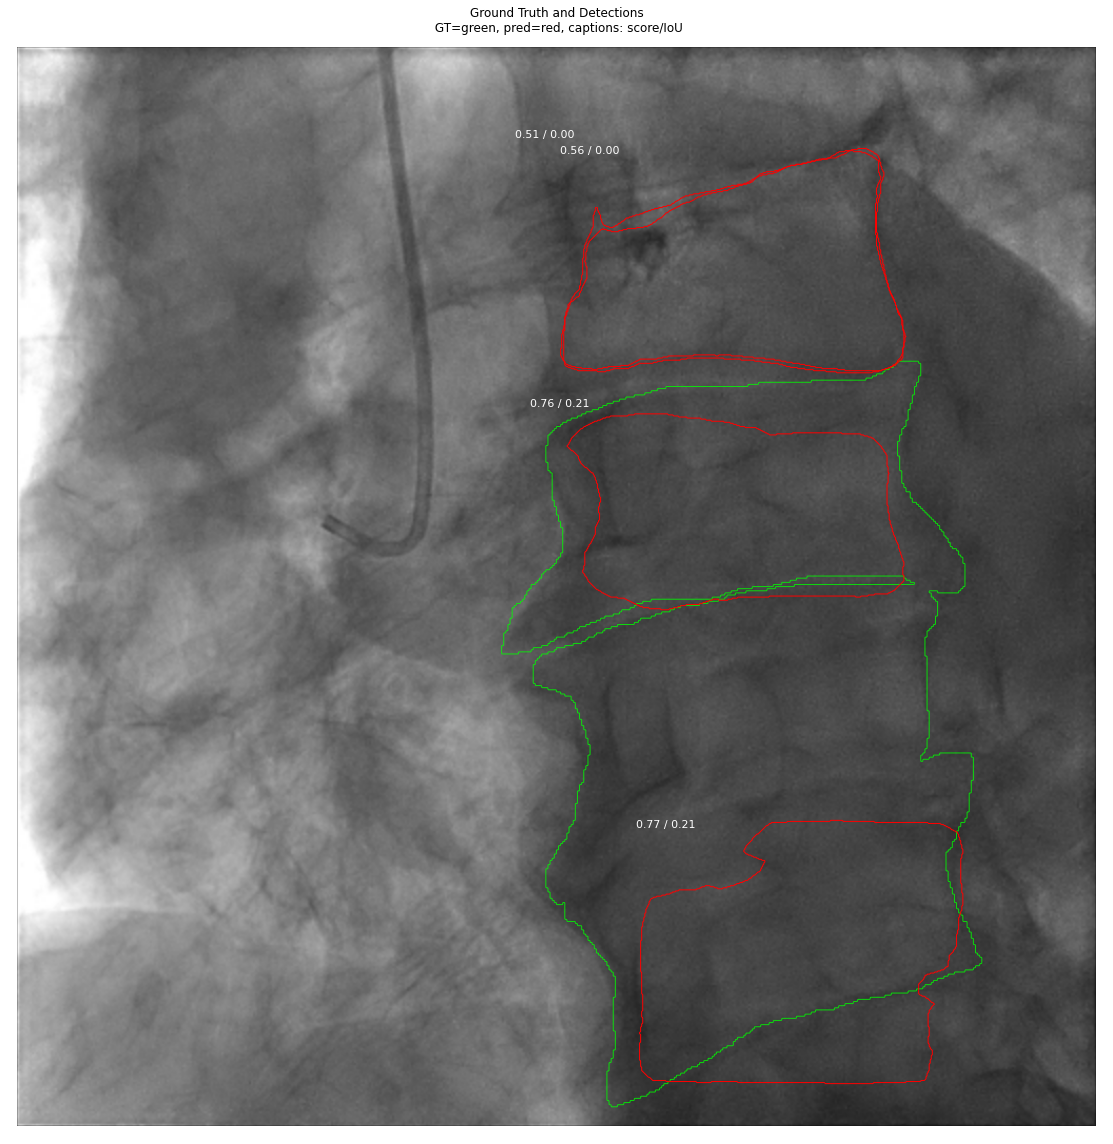

In [47]:
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))
print("Original image shape: ", modellib.parse_image_meta(image_meta[np.newaxis,...])["original_image_shape"][0])

# Run object detection
results = model.detect_molded(np.expand_dims(image, 0), np.expand_dims(image_meta, 0), verbose=1)

# Display results
r = results[0]
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

# Compute AP over range 0.5 to 0.95 and print it
utils.compute_ap_range(gt_bbox, gt_class_id, gt_mask,
                       r['rois'], r['class_ids'], r['scores'], r['masks'],
                       verbose=1)

visualize.display_differences(
    image,
    gt_bbox, gt_class_id, gt_mask,
    r['rois'], r['class_ids'], r['scores'], r['masks'],
    dataset.class_names, ax=get_ax(),
    show_box=False, show_mask=False,
    iou_threshold=0.5, score_threshold=0.5)